In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from itertools import cycle, islice
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('spending.csv')
df.head()

Unnamed: 0        Date     mode_of_purchase sporting_equipment  store  \
0           0  2019-08-01                order            fitness   east   
1           1  2019-08-01                order            jog/run  south   
2           2  2019-08-01                order            pilates  south   
3           3  2019-08-01                order            pilates   east   
4           4  2019-08-01  physical_collection             diving   west   

   estimated_spending  number_of_items_bought  
0             119.412                       5  
1             212.506                       6  
2             107.512                       4  
3              65.651                       5  
4              64.871                       2

In [3]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

Date     mode_of_purchase sporting_equipment  store  \
0  2019-08-01                order            fitness   east   
1  2019-08-01                order            jog/run  south   
2  2019-08-01                order            pilates  south   
3  2019-08-01                order            pilates   east   
4  2019-08-01  physical_collection             diving   west   

   estimated_spending  number_of_items_bought  
0             119.412                       5  
1             212.506                       6  
2             107.512                       4  
3              65.651                       5  
4              64.871                       2

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [6]:
df.head()

Date     mode_of_purchase sporting_equipment  store  \
0 2019-08-01                order            fitness   east   
1 2019-08-01                order            jog/run  south   
2 2019-08-01                order            pilates  south   
3 2019-08-01                order            pilates   east   
4 2019-08-01  physical_collection             diving   west   

   estimated_spending  number_of_items_bought  month  day  
0             119.412                       5      8    1  
1             212.506                       6      8    1  
2             107.512                       4      8    1  
3              65.651                       5      8    1  
4              64.871                       2      8    1

In [7]:
df.isnull().sum()

Date                      0
mode_of_purchase          0
sporting_equipment        0
store                     0
estimated_spending        0
number_of_items_bought    0
month                     0
day                       0
dtype: int64

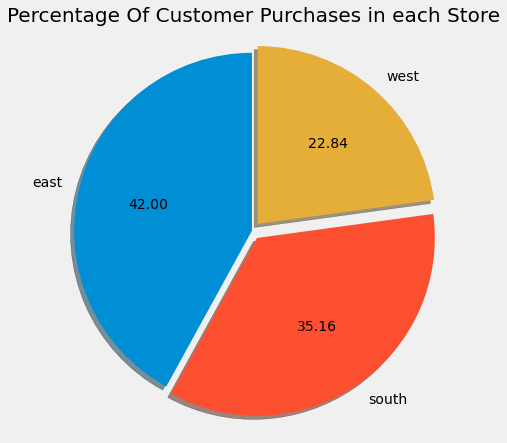

In [8]:
fig1, ax1 = plt.subplots(figsize=(7,7))
#labels=['Store A','Store B','Store C']
explode=(0,0.05, 0.05)
plt.pie(df['store'].value_counts(),labels=df['store'].unique(), explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Percentage Of Customer Purchases in each Store',fontdict={'size':20});

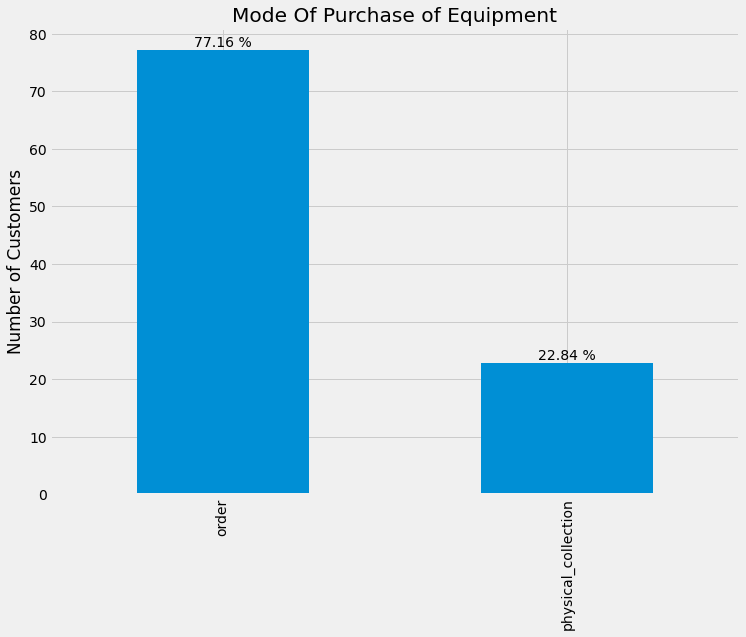

In [9]:
plt.figure(figsize=(11,8))
ax = (df['mode_of_purchase'].value_counts()/len(df['mode_of_purchase'])*100).plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=12)
plt.ylabel('Number of Customers')
plt.title('Mode Of Purchase of Equipment')
plt.show()

In [10]:
df.head(2)

Date mode_of_purchase sporting_equipment  store  estimated_spending  \
0 2019-08-01            order            fitness   east             119.412   
1 2019-08-01            order            jog/run  south             212.506   

   number_of_items_bought  month  day  
0                       5      8    1  
1                       6      8    1

In [12]:
df.head()

Date     mode_of_purchase sporting_equipment  store  \
0 2019-08-01                order            fitness   east   
1 2019-08-01                order            jog/run  south   
2 2019-08-01                order            pilates  south   
3 2019-08-01                order            pilates   east   
4 2019-08-01  physical_collection             diving   west   

   estimated_spending  number_of_items_bought  month  day  
0             119.412                       5      8    1  
1             212.506                       6      8    1  
2             107.512                       4      8    1  
3              65.651                       5      8    1  
4              64.871                       2      8    1

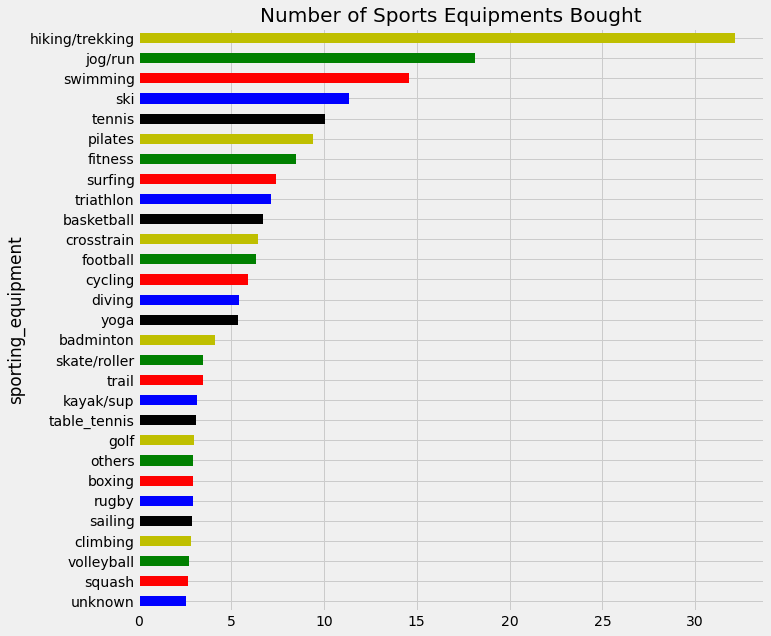

In [13]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax=df.groupby('sporting_equipment')['number_of_items_bought'].mean().sort_values().plot(kind='barh',figsize=(10,10), color=my_colors)
ax.set_title('Number of Sports Equipments Bought',fontdict={'size':20});

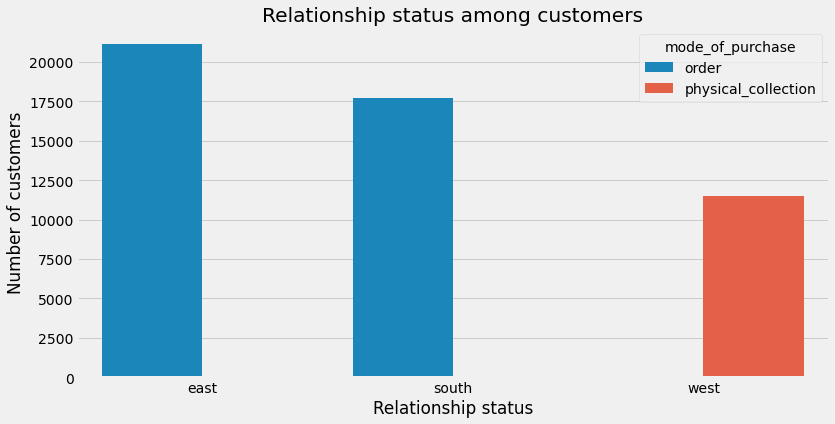

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='store', data=df,hue='mode_of_purchase')
plt.xlabel('Relationship status')
plt.ylabel('Number of customers')
plt.title('Relationship status among customers');

In [15]:
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
50313    10
50314    10
50315    10
50316    10
50317    10
Name: month, Length: 50318, dtype: int64

In [16]:
df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
df['seasons'].value_counts()

autumn    16747
summer    11489
spring     7569
Winter     7378
Name: seasons, dtype: int64

<AxesSubplot:xlabel='seasons'>

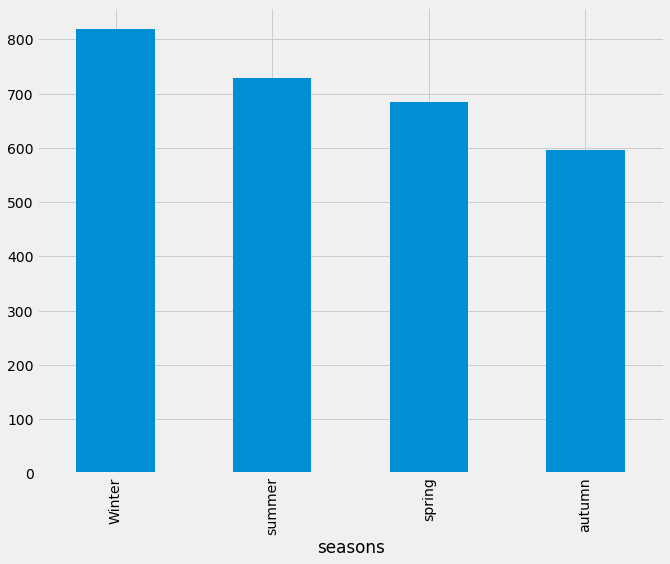

In [17]:
df.groupby('seasons')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [18]:
df.head(3)

Date mode_of_purchase sporting_equipment  store  estimated_spending  \
0 2019-08-01            order            fitness   east             119.412   
1 2019-08-01            order            jog/run  south             212.506   
2 2019-08-01            order            pilates  south             107.512   

   number_of_items_bought  month  day seasons  
0                       5      8    1  autumn  
1                       6      8    1  autumn  
2                       4      8    1  autumn

<AxesSubplot:xlabel='store'>

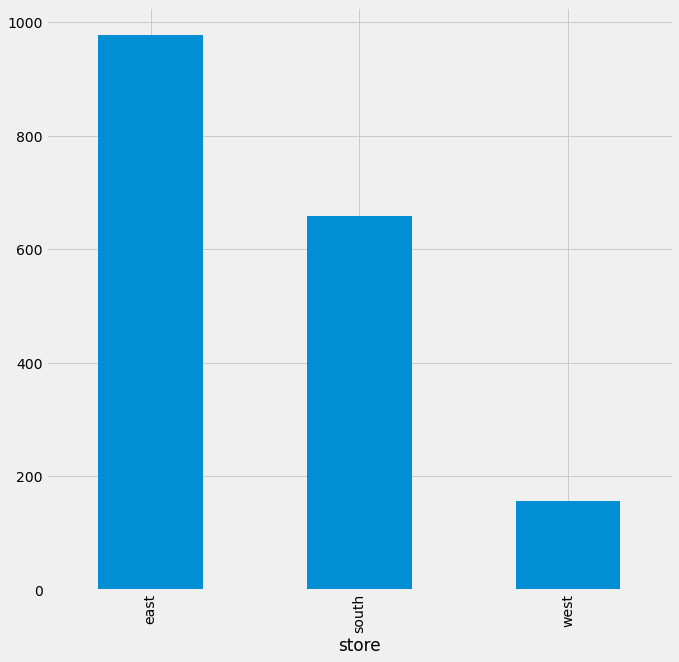

In [19]:
df.groupby('store')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))

In [20]:
df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
df['seasons'].value_counts()

autumn    16747
summer    11489
spring     7569
Winter     7378
Name: seasons, dtype: int64

In [21]:
df['weekday']=np.where((df['Date'].dt.dayofweek) < 5,'weekday','weekend')

In [22]:
df['weekday'].value_counts()

weekday    36035
weekend    14283
Name: weekday, dtype: int64

In [23]:
df

Date     mode_of_purchase sporting_equipment  store  \
0     2019-08-01                order            fitness   east   
1     2019-08-01                order            jog/run  south   
2     2019-08-01                order            pilates  south   
3     2019-08-01                order            pilates   east   
4     2019-08-01  physical_collection             diving   west   
...          ...                  ...                ...    ...   
50313 2021-10-31  physical_collection           climbing   west   
50314 2021-10-31                order         basketball  south   
50315 2021-10-31                order          triathlon   east   
50316 2021-10-31                order             tennis  south   
50317 2021-10-31                order            sailing   east   

       estimated_spending  number_of_items_bought  month  day seasons  weekday  
0                 119.412                       5      8    1  autumn  weekday  
1                 212.506                       6      8    1  autumn  weekday  
2                 107.512                       4      8    1  autumn  weekday  
3                  65.651                       5      8    1  autumn  weekday  
4                  64.871                       2      8    1  autumn  weekday  
...                   ...                     ...    ...  ...     ...      ...  
50313              15.298                       1     10   31  autumn  weekend  
50314              29.714                       2     10   31  autumn  weekend  
50315              70.414                       2     10   31  autumn  weekend  
50316             232.445                       7     10   31  autumn  weekend  
50317              41.475                       3     10   31  autumn  weekend  

[50318 rows x 10 columns]

<AxesSubplot:xlabel='weekday'>

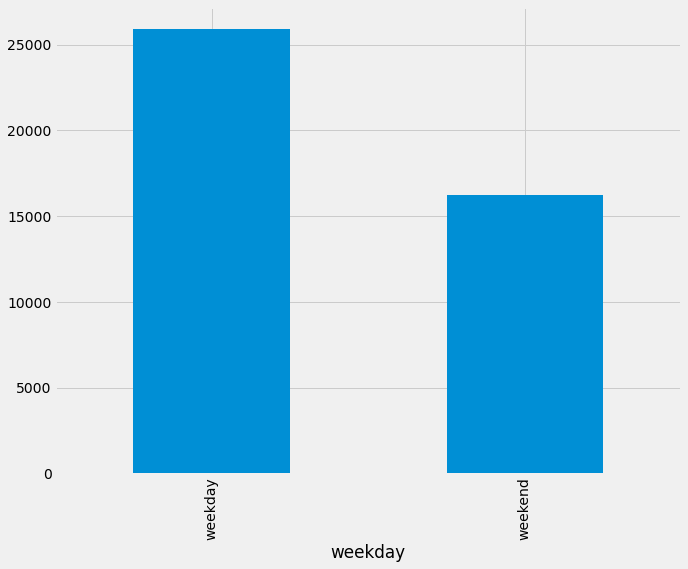

In [24]:
df.groupby('weekday')['estimated_spending'].max().sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [25]:
df.groupby('weekday')['estimated_spending','number_of_items_bought'].mean().sort_values(by='estimated_spending',ascending=False)

estimated_spending  number_of_items_bought
weekday                                            
weekday          719.555868                8.225975
weekend          572.718974                7.075124

In [26]:
df

Date     mode_of_purchase sporting_equipment  store  \
0     2019-08-01                order            fitness   east   
1     2019-08-01                order            jog/run  south   
2     2019-08-01                order            pilates  south   
3     2019-08-01                order            pilates   east   
4     2019-08-01  physical_collection             diving   west   
...          ...                  ...                ...    ...   
50313 2021-10-31  physical_collection           climbing   west   
50314 2021-10-31                order         basketball  south   
50315 2021-10-31                order          triathlon   east   
50316 2021-10-31                order             tennis  south   
50317 2021-10-31                order            sailing   east   

       estimated_spending  number_of_items_bought  month  day seasons  weekday  
0                 119.412                       5      8    1  autumn  weekday  
1                 212.506                       6      8    1  autumn  weekday  
2                 107.512                       4      8    1  autumn  weekday  
3                  65.651                       5      8    1  autumn  weekday  
4                  64.871                       2      8    1  autumn  weekday  
...                   ...                     ...    ...  ...     ...      ...  
50313              15.298                       1     10   31  autumn  weekend  
50314              29.714                       2     10   31  autumn  weekend  
50315              70.414                       2     10   31  autumn  weekend  
50316             232.445                       7     10   31  autumn  weekend  
50317              41.475                       3     10   31  autumn  weekend  

[50318 rows x 10 columns]

In [39]:
df.groupby(['sporting_equipment','seasons'])['estimated_spending','number_of_items_bought'].mean().sort_values(by='estimated_spending',ascending=False)

estimated_spending  number_of_items_bought
sporting_equipment seasons                                            
hiking/trekking    Winter          5644.099159               37.263014
                   spring          4496.163390               34.265193
                   summer          4054.992316               33.529412
ski                Winter          3600.913590               25.266854
hiking/trekking    autumn          3436.575353               28.876695
...                                        ...                     ...
volleyball         autumn            28.768673                2.739796
                   summer            26.204042                2.680556
                   Winter            23.726671                2.817073
unknown            summer            22.977200                2.450000
volleyball         spring            21.234021                2.765957

[116 rows x 2 columns]

In [29]:
df['unit_price']=df['estimated_spending']/df['number_of_items_bought']

Date     mode_of_purchase sporting_equipment  store  \
0     2019-08-01                order            fitness   east   
1     2019-08-01                order            jog/run  south   
2     2019-08-01                order            pilates  south   
3     2019-08-01                order            pilates   east   
4     2019-08-01  physical_collection             diving   west   
...          ...                  ...                ...    ...   
50313 2021-10-31  physical_collection           climbing   west   
50314 2021-10-31                order         basketball  south   
50315 2021-10-31                order          triathlon   east   
50316 2021-10-31                order             tennis  south   
50317 2021-10-31                order            sailing   east   

       estimated_spending  number_of_items_bought  month  day seasons  \
0                 119.412                       5      8    1  autumn   
1                 212.506                       6      8    1  autumn   
2                 107.512                       4      8    1  autumn   
3                  65.651                       5      8    1  autumn   
4                  64.871                       2      8    1  autumn   
...                   ...                     ...    ...  ...     ...   
50313              15.298                       1     10   31  autumn   
50314              29.714                       2     10   31  autumn   
50315              70.414                       2     10   31  autumn   
50316             232.445                       7     10   31  autumn   
50317              41.475                       3     10   31  autumn   

       weekday  unit_price  
0      weekday   23.882400  
1      weekday   35.417667  
2      weekday   26.878000  
3      weekday   13.130200  
4      weekday   32.435500  
...        ...         ...  
50313  weekend   15.298000  
50314  weekend   14.857000  
50315  weekend   35.207000  
50316  weekend   33.206429  
50317  weekend   13.825000  

[50318 rows x 11 columns]

In [33]:
east_store=df[df['store']=='east']
south_store=df[df['store']=='south']
west_store=df[df['store']=='west']

In [35]:
east_store.groupby('sporting_equipment')['unit_price'].mean().sort_values(ascending=False)

sporting_equipment
skate/roller       160.188206
hiking/trekking    141.028663
trail              137.094672
crosstrain         111.309601
kayak/sup          110.446893
diving             100.815884
yoga               100.061082
ski                 94.846959
surfing             94.373284
jog/run             90.005827
football            89.237938
cycling             88.309680
sailing             86.094451
fitness             83.528365
swimming            78.953253
badminton           78.348338
climbing            77.841196
basketball          74.777615
pilates             74.447147
tennis              59.144965
boxing              58.850650
others              55.886633
golf                49.770185
triathlon           47.524367
table_tennis        28.341583
rugby               23.217542
unknown             22.432258
squash              17.965643
volleyball          12.754178
Name: unit_price, dtype: float64

In [36]:
west_store.groupby('sporting_equipment')['unit_price'].mean().sort_values(ascending=False)

sporting_equipment
crosstrain         136.788357
hiking/trekking    127.145808
cycling            104.337030
ski                 96.798867
fitness             79.239821
kayak/sup           63.742197
skate/roller        55.907410
jog/run             41.713217
others              37.688332
football            37.255135
basketball          35.750307
pilates             35.031582
boxing              34.867751
table_tennis        32.669160
yoga                30.663063
swimming            27.493714
diving              26.100018
climbing            23.167162
tennis              23.119742
surfing             22.846161
sailing             21.923573
golf                21.721373
trail               21.611990
badminton           19.079774
triathlon           16.670611
rugby               13.152734
volleyball          12.209707
squash              10.383636
Name: unit_price, dtype: float64

In [37]:
south_store.groupby('sporting_equipment')['unit_price'].mean().sort_values(ascending=False)

sporting_equipment
skate/roller       115.411238
hiking/trekking    115.388135
trail              115.233534
ski                108.514640
crosstrain         101.130677
diving              89.240889
football            86.324848
yoga                84.169860
surfing             79.144339
jog/run             77.342426
swimming            75.493263
fitness             73.712696
basketball          71.767200
badminton           66.413496
kayak/sup           65.426358
tennis              60.783160
pilates             53.549018
triathlon           45.069559
golf                29.883145
cycling             26.164764
squash              23.190013
sailing             23.153626
climbing            20.716466
unknown             19.098279
rugby               18.935808
table_tennis        16.456883
others              14.933448
volleyball          10.292363
boxing               7.821542
Name: unit_price, dtype: float64